# Primero se sacan los duplicados del orden original

In [4]:
import pandas as pd
import numpy as np

# Read the original CSV file

df_pos_negatome = pd.read_csv("../Inputs/Negatome_Raw.csv", sep=';')
df_pos_negatome.columns = ['id_1', 'seq_1', 'id_2', 'seq_2']

df_pos_negatome[['id_1', 'id_2']] = pd.DataFrame(np.sort(df_pos_negatome[['id_1', 'id_2']], axis=1), columns=['id_1', 'id_2'])

# Drop duplicate rows
df_negatome = df_pos_negatome.drop_duplicates(subset=['id_1','id_2'])
df_negatome

,id_1,seq_1,id_2,seq_2
0,A7MB62,MDSQGRKVVVCDNGTGFVKCGYAGSNFPEHIFPALVGRPIIRSTTK...,Q3MHR7,MILLEVNNRIIEETLALKFENAAAGNKPEAVEVTFADFDGVLYHIS...
19,A7MB62,MDSQGRKVVVCDNGTGFVKCGYAGSNFPEHIFPALVGRPIIRSTTK...,Q3T035,MPAYHSSLMDPDTKLIGNMALLPIRSQFKGPAPRETKDTDIVDEAI...
38,C6E9R4,MSMSTSTEVIAHHWAFAIFLIVAIGLCCLMLVGGWFLGGRARARSK...,C6E9S4,MNMLALTIILPLIGFVLLAFSRGRWSENVSAIVGVGSVGLAALVTA...
39,C6E9R4,MSMSTSTEVIAHHWAFAIFLIVAIGLCCLMLVGGWFLGGRARARSK...,C6E9S5,MLLPWLILIPFIGGFLCWQTERFGVKVPRWIALITMGLTLALSLQL...
40,C6E9S2,MEFAFYICGLIAILATLRVITHTNPVHALLYLIISLLAISGVFFSL...,C6E9S5,MLLPWLILIPFIGGFLCWQTERFGVKVPRWIALITMGLTLALSLQL...
...,...,...,...,...
15572,Q9R1P3,MEYLIGIQGPDYVLVASDRVAASNIVQMKDDHDKMFKMSEKILLLC...,Q9R1P4,MFRNQYDNDVTVWSPQGRIHQIEYAMEAVKQGSATVGLKSKTHAVL...
15576,Q9R1P3,MEYLIGIQGPDYVLVASDRVAASNIVQMKDDHDKMFKMSEKILLLC...,Q9Z2U1,MFLTRSEYDRGVNTFSPEGRLFQVEYAIEAIKLGSTAIGIQTSEGV...
15580,Q9R1P4,MFRNQYDNDVTVWSPQGRIHQIEYAMEAVKQGSATVGLKSKTHAVL...,Q9Z2U0,MSYDRAITVFSPDGHLFQVEYAQEAVKKGSTAVGVRGKDIVVLGVA...
15585,Q9S831,PKRGSKVKILRRESYWFKNVGSVVAVDQDPKTRYPVVVRFAKVNYA...,Q9SY97,WLAYGEIINGRFAMLGAAGAIAPEILGKAGLIPAETALPWFQTGVI...


# Se revisa que no hayan NaN ni duplicados

In [5]:
if (df_negatome.isnull().values.any()) == True:
    print("Hay valores nulos")
    
#Si hay valores nulos se dropean
df_negatome.dropna(inplace=True)

#Ya no hay valores nulos
if (df_negatome.isnull().values.any()) == False:
    print("No Hay valores nulos")

# Check if there are any duplicate interactions left
duplicate_interactions = df_negatome[df_negatome.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions) 

No Hay valores nulos
No duplicate interactions found.


C:\Users\julia\AppData\Local\Temp\ipykernel_15224\402419657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatome.dropna(inplace=True)


# Se agrega el O y el Database de donde vienen

In [6]:
#Para poner el cero de que es negativa la interacción
df_negatome['dataset'] = 'negatome'
df_negatome['Interaccion'] = 0

C:\Users\julia\AppData\Local\Temp\ipykernel_15224\3190080670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatome['dataset'] = 'negatome'
C:\Users\julia\AppData\Local\Temp\ipykernel_15224\3190080670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatome['Interaccion'] = 0


# Se ven los ids unicos y las seq unicas

In [7]:
df_1 = df_negatome.filter(['id_1','seq_1'], axis=1)
df_1.columns = ['id_seq','seq']

df_2 = df_negatome.filter(['id_2','seq_2'], axis=1)
df_2.columns = ['id_seq','seq']

#concatenar
df_all_seq = pd.concat([df_1, df_2])

df_unique_id = df_all_seq.drop_duplicates(subset=['id_seq'],ignore_index=True)
df_unique_id.info()

df_unique_seq = df_all_seq.drop_duplicates(subset=['seq'],ignore_index=True)
df_unique_seq.info()


#df_unique_id.to_csv('unique_ids_negatome_negatives.csv', index_label=False, index=False, encoding='utf-8')
#df_unique_seq.to_csv('unique_seq_negatome_negatives.csv', index_label=False, index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_seq  598 non-null    object
 1   seq     598 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_seq  699 non-null    object
 1   seq     699 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB


# Se filta para para que queden ids unicos con secuencias unicas

In [8]:
#IDS
id = pd.read_csv("../Outputs/unique_ids_negatome_negatives.csv", sep=',')
lista_valores = id['id_seq']
print(len(id['id_seq']))

seq = pd.read_csv("../Outputs/unique_seq_negatome_negatives.csv", sep=',')
lista_valores_x = seq['seq']
print(len(seq['seq']))

df_filtrado = df_negatome[df_negatome['id_1'].isin(lista_valores)]
df_filtrado_2 = df_filtrado[df_filtrado['id_2'].isin(lista_valores)]
print(df_filtrado_2)

df_filtrado_x = df_filtrado_2[df_filtrado_2['seq_1'].isin(lista_valores_x)]
df_filtrado_y = df_filtrado_x[df_filtrado_x['seq_2'].isin(lista_valores_x)]
print(df_filtrado_y)

if (df_filtrado_y.isnull().values.any()) == True:
    print("Hay valores nulos")

#df_filtrado_y.to_csv('negatome_negatives_Refined.csv', index_label=False, index=False, encoding='utf-8')

598
699
         id_1                                              seq_1    id_2  \
0      A7MB62  MDSQGRKVVVCDNGTGFVKCGYAGSNFPEHIFPALVGRPIIRSTTK...  Q3MHR7   
19     A7MB62  MDSQGRKVVVCDNGTGFVKCGYAGSNFPEHIFPALVGRPIIRSTTK...  Q3T035   
38     C6E9R4  MSMSTSTEVIAHHWAFAIFLIVAIGLCCLMLVGGWFLGGRARARSK...  C6E9S4   
39     C6E9R4  MSMSTSTEVIAHHWAFAIFLIVAIGLCCLMLVGGWFLGGRARARSK...  C6E9S5   
40     C6E9S2  MEFAFYICGLIAILATLRVITHTNPVHALLYLIISLLAISGVFFSL...  C6E9S5   
...       ...                                                ...     ...   
15572  Q9R1P3  MEYLIGIQGPDYVLVASDRVAASNIVQMKDDHDKMFKMSEKILLLC...  Q9R1P4   
15576  Q9R1P3  MEYLIGIQGPDYVLVASDRVAASNIVQMKDDHDKMFKMSEKILLLC...  Q9Z2U1   
15580  Q9R1P4  MFRNQYDNDVTVWSPQGRIHQIEYAMEAVKQGSATVGLKSKTHAVL...  Q9Z2U0   
15585  Q9S831  PKRGSKVKILRRESYWFKNVGSVVAVDQDPKTRYPVVVRFAKVNYA...  Q9SY97   
15588  O15234  PQRSVEGWILFVTGVHEEATEEDIHDKFAEYGEIKNIHLNLDRRTG...  Q9Y5S9   

                                                   seq_2   dataset  \
0      MI

# Se revisa denuevo si es que hay duplicados

In [9]:
duplicate = df_filtrado_y[df_filtrado_y.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions) 

No duplicate interactions found.


In [10]:
lista_valores_x = id['seq']
Large = []
for i in range(0,len(lista_valores_x)):
    Large.append(len(lista_valores_x[i]))
    
df_large = pd.DataFrame(Large)
df_large
df_large.describe()

,0
count,598.000000
mean,187.449833
std,198.601965
min,5.000000
25%,65.000000
50%,138.000000
75%,240.000000
max,1752.000000


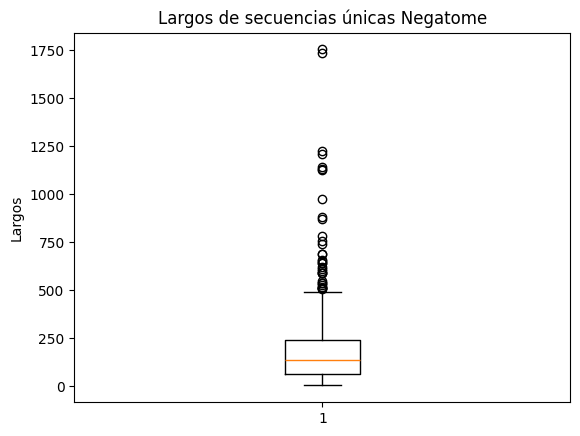

In [13]:
import matplotlib.pyplot as plt

# Crea el boxplot
plt.boxplot(Large)

# Personaliza el gráfico (opcional)
plt.title("Largos de secuencias únicas Negatome")
plt.ylabel("Largos")

# Muestra el gráfico
#plt.savefig('boxplot.png')
plt.show()


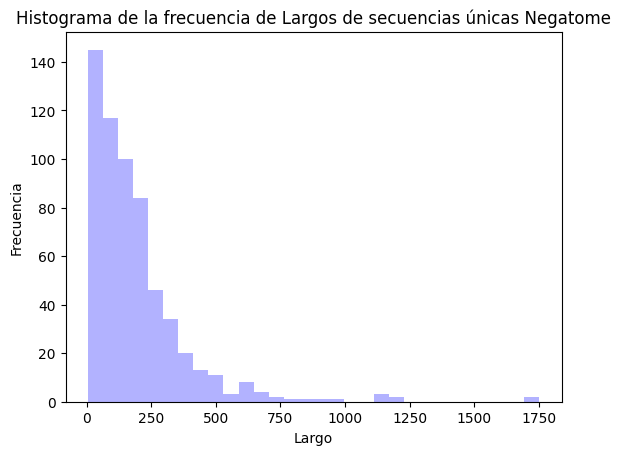

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un histograma para la distribución normal
plt.hist(Large, bins=30, density=False, alpha=0.3, color='b')
plt.xlabel('Largo')
plt.ylabel('Frecuencia')
plt.title('Histograma de la frecuencia de Largos de secuencias únicas Negatome')
plt.show()

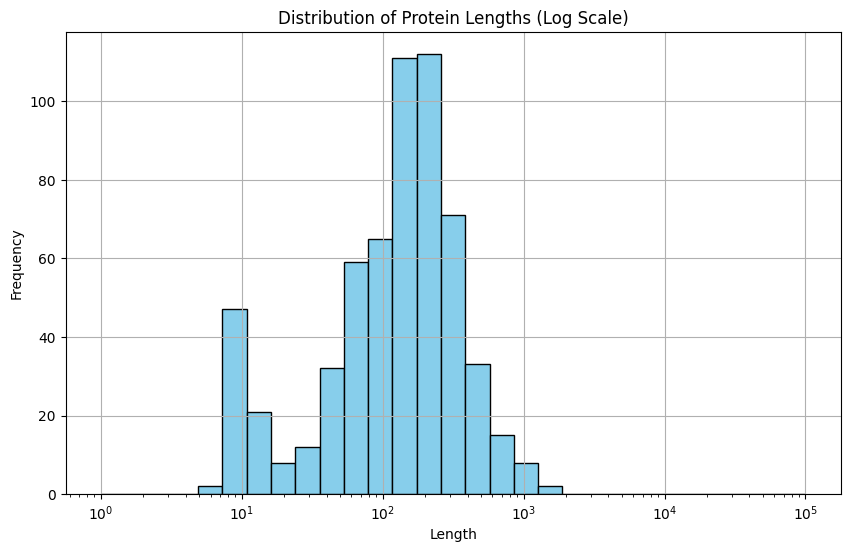

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(Large, bins=np.logspace(0, 5, 30), color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Protein Lengths (Log Scale)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(True)
#plt.savefig('gauss.png')
plt.show()